<a href="https://colab.research.google.com/github/debapriyaroy95/Pandas-Project/blob/master/Pandas_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import os

In [0]:
all_months_data = pd.DataFrame() 

# How to merge csv files together

In [0]:
files = [ files for files in os.listdir('./sales_data')]
   

for files in files : 
    df = pd.read_csv('./sales_data/'+files)
    all_months_data = pd.concat([all_months_data,df])


In [0]:
all_months_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Unnamed: 0
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",NaN
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",NaN
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",NaN
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",NaN
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",NaN
...,...,...,...,...,...,...,...
13617,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215",NaN
13618,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001",NaN
13619,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016",NaN
13620,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016",NaN


In [0]:
all_months_data.to_csv('all_data.csv',index = False)

# How to Split .csv file

In [0]:
#File Splitting

segments = 10
len(all_months_data)

split_on = int(len(all_months_data)/segments)

for i in range(segments) :
    start  = i*split_on
    end = (i+1)*split_on
    print(start,end)
    if i == segments-1:
        df1 = all_months_data[start:]
        
    else:
        df1 = all_months_data[start:end]
    df1.fillna('',inplace=True)
    df1.to_csv('A'+'_'+str(i+1)+'.csv',index=False)
    

0 18685
18685 37370
37370 56055


/opt/miniconda3/lib/python3.7/site-packages/pandas/core/frame.py:4150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


56055 74740
74740 93425
93425 112110
112110 130795
130795 149480
149480 168165
168165 186850


In [0]:
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Unnamed: 0
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",NaN
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",NaN
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",NaN
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",NaN
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",NaN


# Best Month for sale ? How much was earned that month ?

# Cleaning The Data and deleting null rows

In [0]:
#Reading the csv 
all_data = pd.read_csv('all_data.csv')

del all_data['Unnamed: 0']

In [0]:
all_nulls = all_data[all_data.isna().any(axis=1)]
all_nulls.head()

all_data = all_data.dropna(how = 'any')

In [0]:
all_data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [0]:
all_data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Unnamed: 0'],
      dtype='object')


# Extracting the Month Column 

In [0]:
all_data['Month'] = all_data['Order Date'].str[:2]
all_data['Month'] = all_data.Month.apply(int)

In [0]:
#some data have "or" in month segment

all_data = all_data[all_data['Order Date'].str[:2]!='Or']

In [0]:
all_data['Month'] = all_data['Order Date'].str[:2]
all_data['Month'] = all_data.Month.astype('int32')
all_data.head()

/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


In [0]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month                int32
dtype: object

# Adding a Sales Column :

In [0]:
all_data['Price Each'] = all_data['Price Each'].astype('float')
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype('int32')

all_data.dtypes

all_data['Sales'] = all_data['Price Each']*all_data['Quantity Ordered']

/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

In [0]:
#Best Month

all_data.groupby(['Month']).sum().sort_values('Sales',ascending = False).index[0]

12

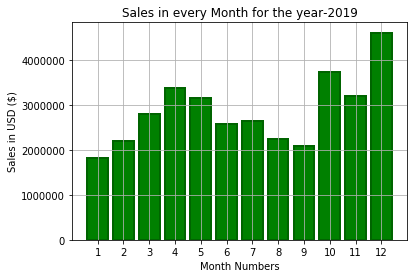

In [0]:
results = all_data.groupby(['Month']).sum()
months = range(1,13)

import matplotlib.pyplot as plt

plt.bar(months,results['Sales'],color = 'green',linewidth=2,edgecolor = 'darkgreen')
plt.grid()
plt.xticks(months)
plt.xlabel('Month Numbers')
plt.ylabel('Sales in USD ($)')
plt.title('Sales in every Month for the year-2019')
plt.show()

# Which City has the highest Number of Sales ??

In [0]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95
...,...,...,...,...,...,...,...,...
186847,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215",6,2.99
186848,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001",6,149.99
186849,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016",6,11.95
186850,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016",6,11.95


In [0]:
all_data['Country_Code'] = all_data['Purchase Address'].str[-9:-6]

# To check which city has the maximum entry
all_data['Country_Code'].value_counts().sort_values()

all_data['City'] = all_data['Purchase Address'].apply(lambda x : x.split(',')[1])

all_data['City_And_Country'] = all_data['City'] + ' (' + all_data['Country_Code'] + ')'

all_data.head()

/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City_Code,Country_Code,City,City_And_Country
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,NY,NY,New York City,New York City ( NY)
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,NY,NY,New York City,New York City ( NY)
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,NY,NY,New York City,New York City ( NY)
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,CA,CA,San Francisco,San Francisco ( CA)
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,GA,GA,Atlanta,Atlanta ( GA)


In [0]:


result_city = all_data.groupby(['City_And_Country']).sum()

#city_Names = list(all_data.City_And_Country.unique())
city_Names =[city for city , df in all_data.groupby('City_And_Country')]
print(result_city)
city_Names

                      Quantity Ordered    Price Each   Month         Sales
City_And_Country                                                          
 Atlanta ( GA)                   16602  2.779908e+06  104794  2.795499e+06
 Austin ( TX)                    11153  1.809874e+06   69829  1.819582e+06
 Boston ( MA)                    22528  3.637410e+06  141112  3.661642e+06
 Dallas ( TX)                    16730  2.752628e+06  104620  2.767975e+06
 Los Angeles ( CA)               33289  5.421435e+06  208325  5.452571e+06
 New York City ( NY)             27932  4.635371e+06  175741  4.664317e+06
 Portland ( ME)                   2750  4.471893e+05   17144  4.497583e+05
 Portland ( OR)                  11303  1.860558e+06   70621  1.870732e+06
 San Francisco ( CA)             50239  8.211462e+06  315520  8.262204e+06
 Seattle ( WA)                   16553  2.733296e+06  104941  2.747755e+06


[' Atlanta ( GA)',
 ' Austin ( TX)',
 ' Boston ( MA)',
 ' Dallas ( TX)',
 ' Los Angeles ( CA)',
 ' New York City ( NY)',
 ' Portland ( ME)',
 ' Portland ( OR)',
 ' San Francisco ( CA)',
 ' Seattle ( WA)']

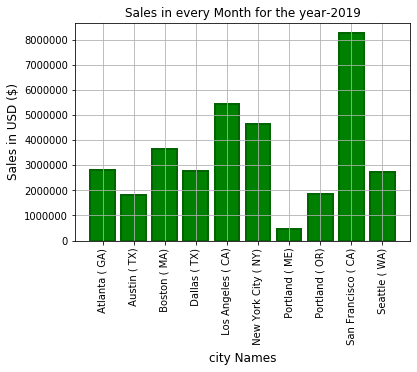

In [0]:
plt.bar(city_Names,result_city['Sales'],color = 'green',linewidth=2,edgecolor = 'darkgreen')
plt.grid()
plt.xticks(city_Names,rotation = 'vertical')
plt.xlabel('city Names',size =12)
plt.ylabel('Sales in USD ($)',size =12)
plt.title('Sales in every Month for the year-2019')
plt.show()

# What Time should we show advertisements to maximize sales ??

In [0]:
all_data['Order Date']= pd.to_datetime(all_data['Order Date'])


/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
all_data

all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Mins'] = all_data['Order Date'].dt.minute

all_data.head()

/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City_Code,Country_Code,City,City_And_Country,Hour,Mins
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,NY,NY,New York City,New York City ( NY),0,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,NY,NY,New York City,New York City ( NY),7,3
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,NY,NY,New York City,New York City ( NY),18,21
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,CA,CA,San Francisco,San Francisco ( CA),15,13
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,GA,GA,Atlanta,Atlanta ( GA),12,38


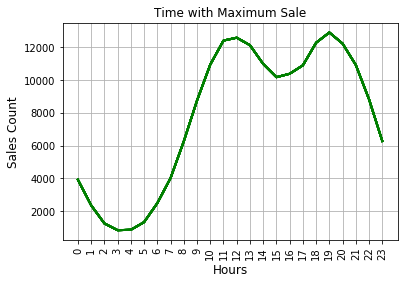

In [0]:
hours = [hour for hour , df in all_data.groupby('Hour')]

result3 = all_data.groupby('Hour').count()
result3
plt.plot(hours,result3,color = 'green',linewidth=2)
plt.grid()
plt.xticks(hours,rotation = 'vertical')
plt.xlabel('Hours',size =12)
plt.ylabel('Sales Count',size =12)
plt.title('Time with Maximum Sale')
plt.show()

# What Products are Sold Together , in Group ? 

In [0]:
#First Find the Duplicate Order IDS :
df = all_data[all_data['Order ID'].duplicated(keep = False)]
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City_Code,Country_Code,City,City_And_Country,Hour,Mins
16,295681,Google Phone,1,600.00,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,600.00,MA,MA,Boston,Boston ( MA),12,37
17,295681,USB-C Charging Cable,1,11.95,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,11.95,MA,MA,Boston,Boston ( MA),12,37
18,295681,Bose SoundSport Headphones,1,99.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,99.99,MA,MA,Boston,Boston ( MA),12,37
19,295681,Wired Headphones,1,11.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,11.99,MA,MA,Boston,Boston ( MA),12,37
36,295698,Vareebadd Phone,1,400.00,2019-12-13 14:32:00,"175 1st St, New York City, NY 10001",12,400.00,NY,NY,New York City,New York City ( NY),14,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186822,222882,AA Batteries (4-pack),1,3.84,2019-06-18 11:37:00,"990 Walnut St, Los Angeles, CA 90001",6,3.84,CA,CA,Los Angeles,Los Angeles ( CA),11,37
186824,222884,Google Phone,1,600.00,2019-06-04 12:06:00,"819 Pine St, New York City, NY 10001",6,600.00,NY,NY,New York City,New York City ( NY),12,6
186825,222884,USB-C Charging Cable,1,11.95,2019-06-04 12:06:00,"819 Pine St, New York City, NY 10001",6,11.95,NY,NY,New York City,New York City ( NY),12,6
186844,222903,iPhone,1,700.00,2019-06-07 22:21:00,"685 Hickory St, New York City, NY 10001",6,700.00,NY,NY,New York City,New York City ( NY),22,21


In [0]:
df['Grouped']=df.groupby('Order ID')['Product'].transform(lambda x : ','.join(x))
df = df[['Order ID','Grouped']].drop_duplicates()

/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
from itertools import combinations
from collections import Counter

In [0]:
count = dict(Counter(df['Grouped']))

In [0]:
most_sold_combo =[x for x in count if count[x]==max(count.values())]

In [0]:
print('The Most Sold Combo are : ')
for i in most_sold_combo:
    print(i)
    print('\n')



all_data.head()

The Most Sold Combo are : 
iPhone,Lightning Charging Cable




,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City_Code,Country_Code,City,City_And_Country,Hour,Mins
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,NY,NY,New York City,New York City ( NY),0,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,NY,NY,New York City,New York City ( NY),7,3
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,NY,NY,New York City,New York City ( NY),18,21
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,CA,CA,San Francisco,San Francisco ( CA),15,13
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,GA,GA,Atlanta,Atlanta ( GA),12,38


# What Product was sold the most and why ?

In [0]:
quantity_ordered =all_data.groupby('Product').sum()
products = [products for products , df in all_data.groupby('Product')]



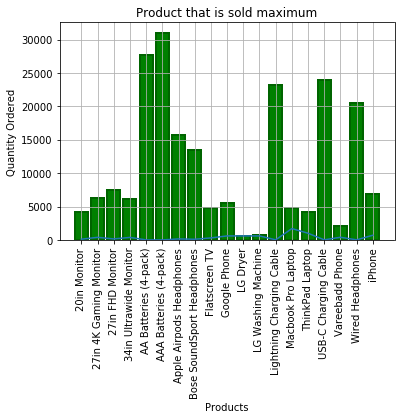

In [0]:
plt.bar(products,quantity_ordered['Quantity Ordered'],color = 'green',linewidth=2,edgecolor = 'darkgreen')
plt.grid()
plt.xticks(products,rotation ='vertical')
plt.xlabel('Products')
plt.ylabel('Quantity Ordered')
plt.title('Product that is sold maximum')
plt.show()

In [0]:
all_data.corr()

,Quantity Ordered,Price Each,Month,Sales,Hour,Mins
Quantity Ordered,1.000000,-0.148272,0.000791,-0.139417,-0.002218,0.001225
Price Each,-0.148272,1.000000,-0.003375,0.999203,0.001721,-0.002163
Month,0.000791,-0.003375,1.000000,-0.003466,0.001731,-0.002075
Sales,-0.139417,0.999203,-0.003466,1.000000,0.001668,-0.002162
Hour,-0.002218,0.001721,0.001731,0.001668,1.000000,-0.015345
Mins,0.001225,-0.002163,-0.002075,-0.002162,-0.015345,1.000000


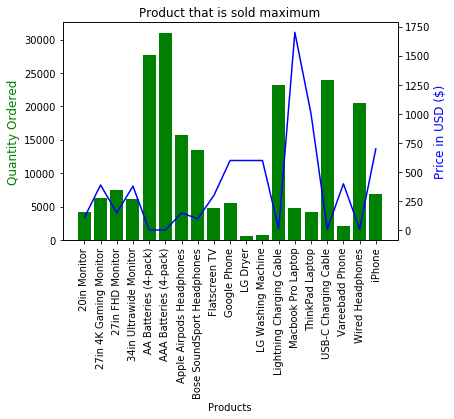

In [0]:
prices=all_data.groupby('Product').mean()['Price Each']

fig,ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(products,quantity_ordered['Quantity Ordered'],color="green")
ax2.plot(products,prices,'b-')
ax1.set_xticklabels(products,rotation ='vertical')
ax1.set_xlabel('Products')
ax1.set_ylabel('Quantity Ordered',color="green",size =12)
ax2.set_ylabel('Price in USD ($)',color= "blue",size =12)
plt.title('Product that is sold maximum')
plt.show()

In [0]:
import seaborn as sns

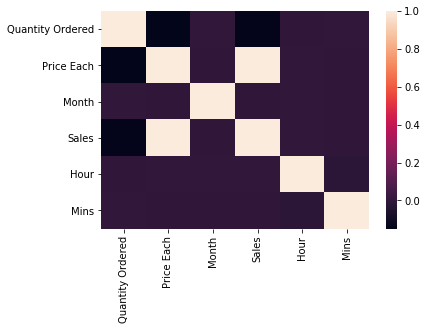

In [0]:
sns.heatmap(all_data.corr())